In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [4]:
email = pd.read_csv('email_table.csv')
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [5]:
opened = pd.read_csv('email_opened_table.csv')
opened.head()
opened['opened'] = 1
opened.head()

,email_id,opened
0,284534,1
1,609056,1
2,220820,1
3,905936,1
4,164034,1


In [6]:
clicked = pd.read_csv('link_clicked_table.csv')
clicked['clicked'] = 1
clicked.head()

,email_id,clicked
0,609056,1
1,870980,1
2,935124,1
3,158501,1
4,177561,1


In [7]:
email = email.merge(opened, on = 'email_id', how = 'left')

In [8]:
email = email.merge(clicked, on = 'email_id', how = 'left')

In [22]:
email['opened'] = email['opened'].fillna(0)
email['clicked'] = email['clicked'].fillna(0)
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [68]:
email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
opened                 0
clicked                0
dtype: int64

# What percentage of users opened the email and what percentage clicked on the link within the email?

In [58]:
email['opened'].sum()/len(email) * 100 #percentage of users open email

10.345

In [59]:
email['clicked'].sum()/len(email) * 100 # percentage of user click link

2.119

# Exploratory Analysis

# Email Text

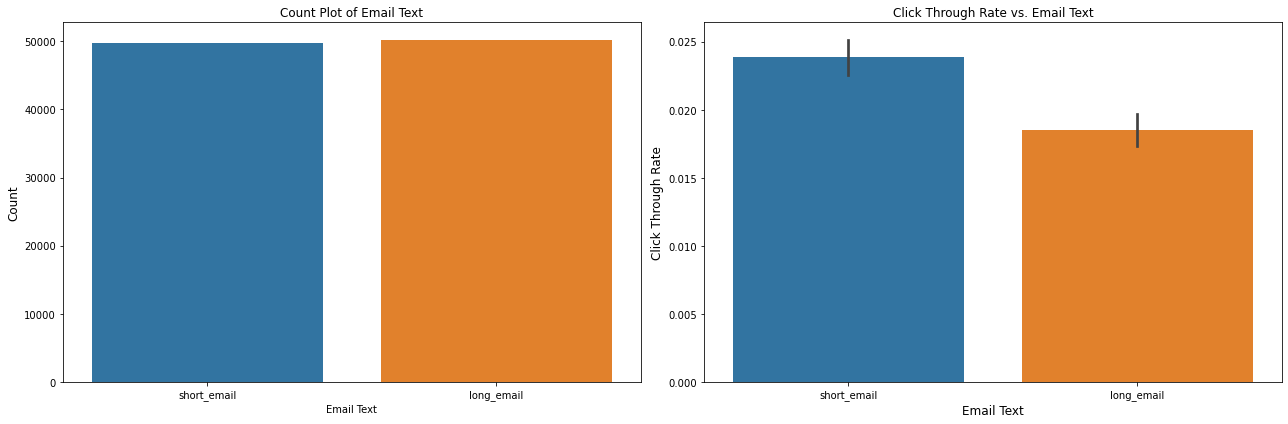

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='email_text', data=email, ax=ax[0])
ax[0].set_xlabel('Email Text')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Text')

sns.barplot(x='email_text', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('Email Text', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Email Text')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='email_text', ylabel='opened'>

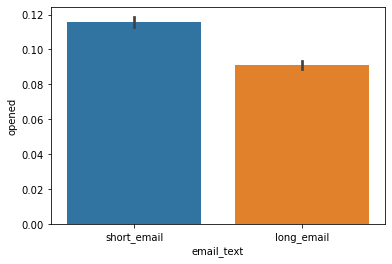

In [46]:
sns.barplot(data=email, x="email_text", y = 'opened')

# Email Version

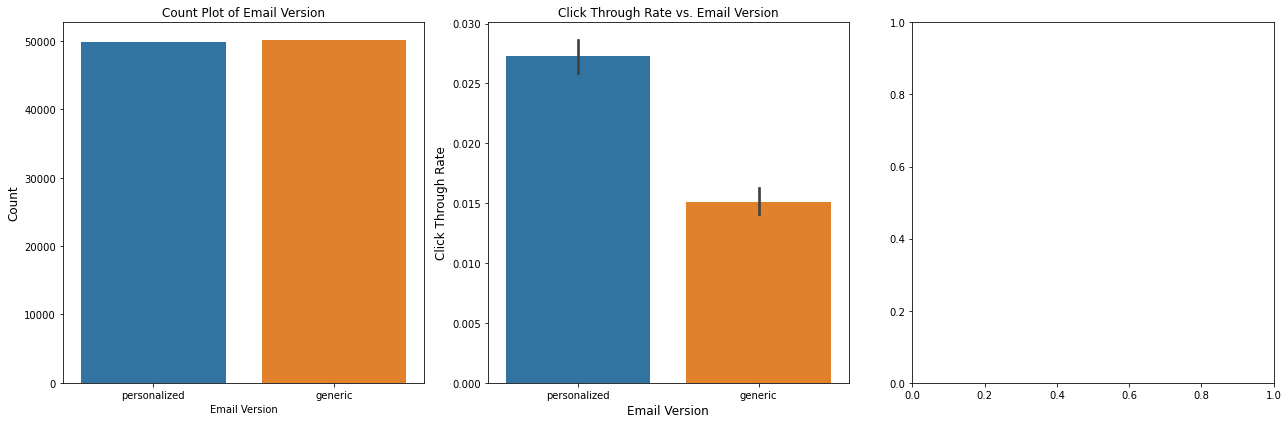

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.countplot(x='email_version', data=email, ax=ax[0])
ax[0].set_xlabel('Email Version')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Version')

sns.barplot(x='email_version', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('Email Version', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Email Version')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='email_version', ylabel='opened'>

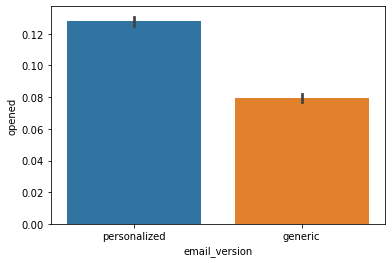

In [48]:
sns.barplot(data=email, x="email_version", y = 'opened')

# Hour

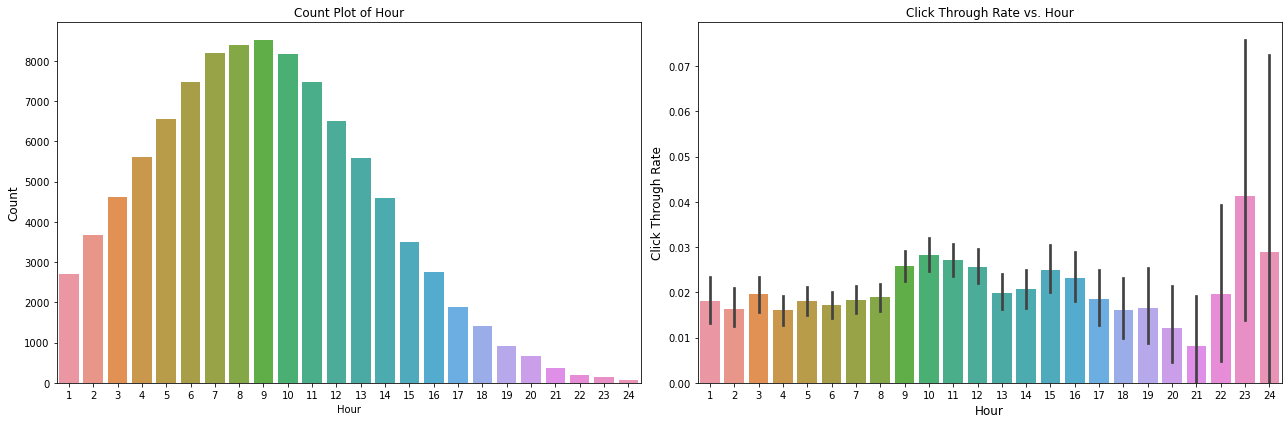

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='hour', data=email, ax=ax[0])
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Hour')

sns.barplot(x='hour', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Hour')
plt.tight_layout()
plt.show()

# Weekday

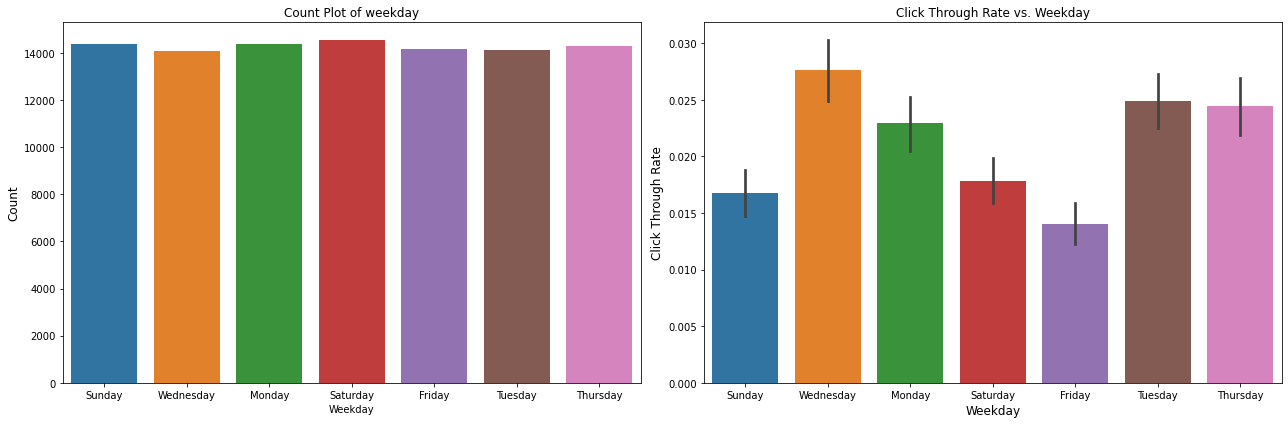

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='weekday', data=email, ax=ax[0])
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of weekday')

sns.barplot(x='weekday', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('Weekday', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Weekday')
plt.tight_layout()
plt.show()

# User Country

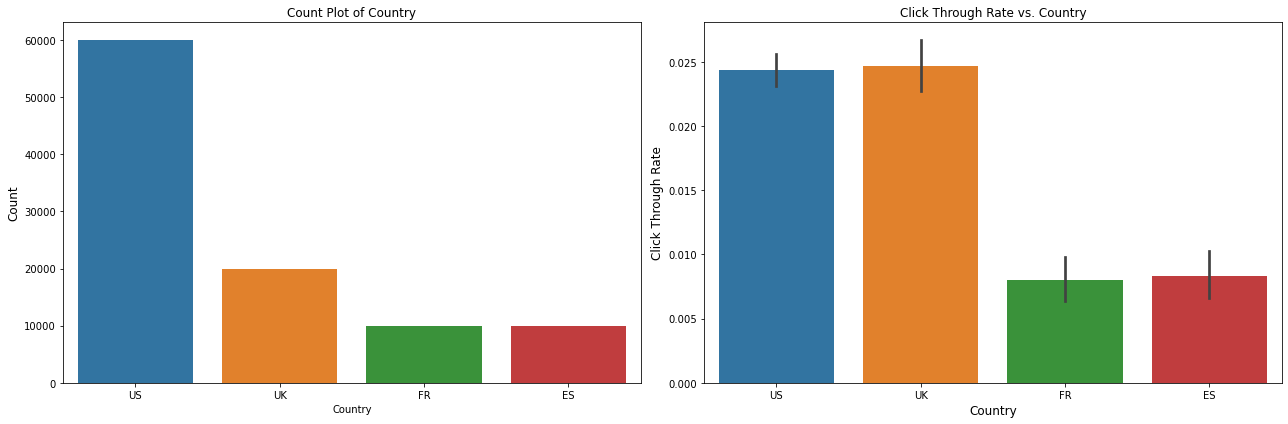

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='user_country', data=email, ax=ax[0])
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Country')

sns.barplot(x='user_country', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Country')
plt.tight_layout()
plt.show()

# Past purchases

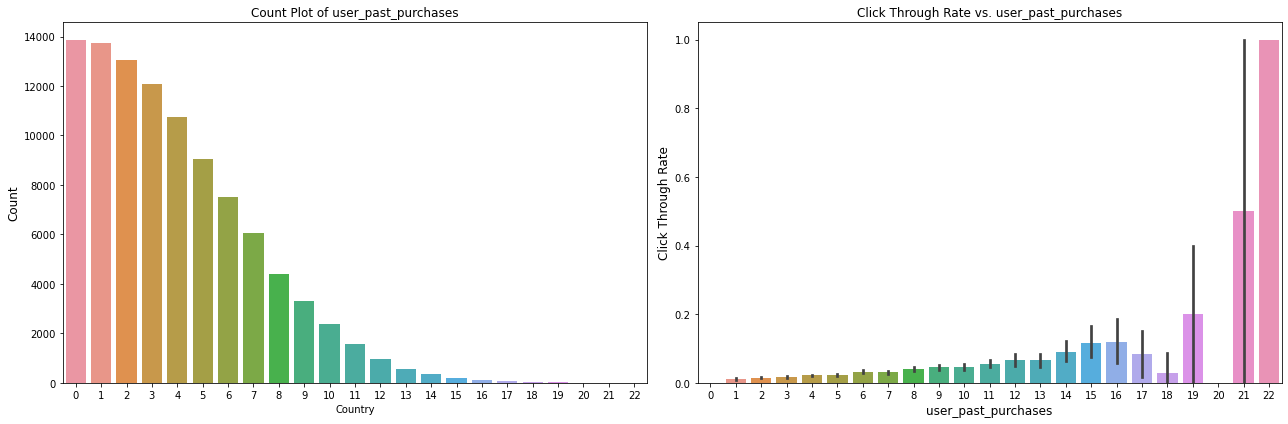

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='user_past_purchases', data=email, ax=ax[0])
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of user_past_purchases')

sns.barplot(x='user_past_purchases', y='clicked', data=email, ax=ax[1])
ax[1].set_xlabel('user_past_purchases', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. user_past_purchases')
plt.tight_layout()
plt.show()

In [67]:
labelencoder = LabelEncoder()
email['email_text'] = labelencoder.fit_transform(email['email_text'])
email['email_version'] = labelencoder.fit_transform(email['email_version'])
email['weekday'] = labelencoder.fit_transform(email['weekday'])
email['user_country'] = labelencoder.fit_transform(email['user_country'])
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,1,1,2,3,3,5,0.0,0.0
1,966622,0,1,12,3,2,2,1.0,1.0
2,777221,0,1,11,6,3,2,0.0,0.0
3,493711,1,0,6,1,2,1,0.0,0.0
4,106887,0,0,14,1,3,6,0.0,0.0


In [100]:
X = email[['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']]
y = email['clicked']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [102]:
# Random Forest
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.97724


In [103]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     24924
         1.0       0.01      0.07      0.02        76

    accuracy                           0.98     25000
   macro avg       0.50      0.52      0.50     25000
weighted avg       0.99      0.98      0.99     25000



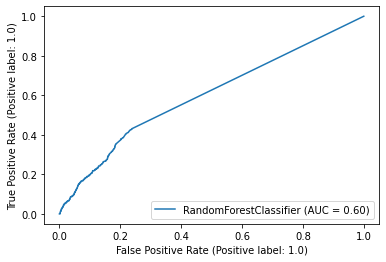

In [104]:
metrics.plot_roc_curve(clf, X_test, y_test)  

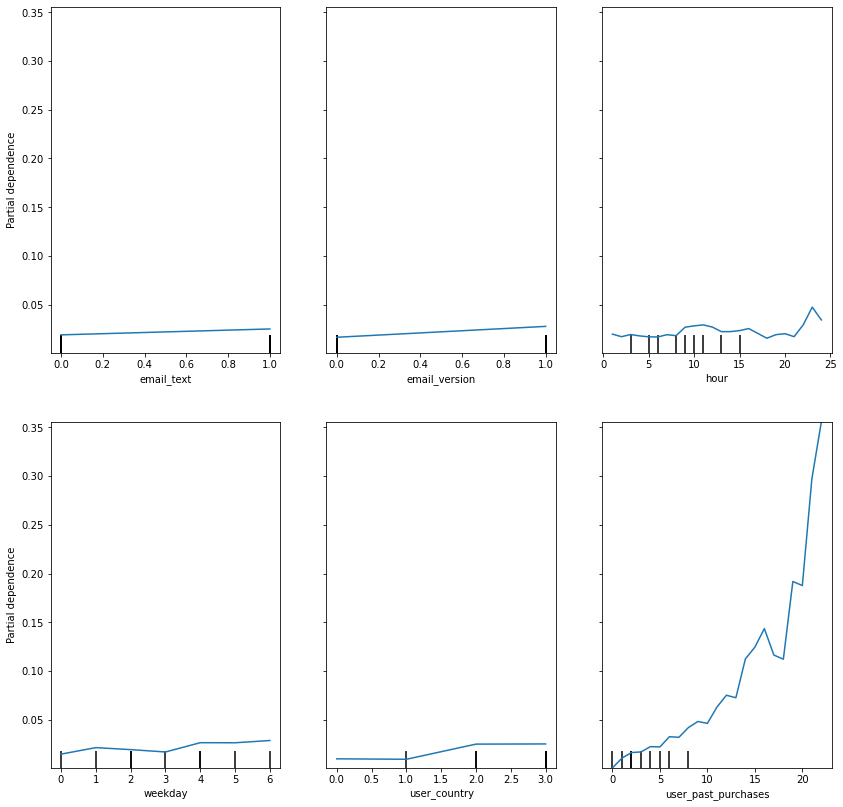

In [106]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(14, 14))
my_plots = plot_partial_dependence(clf,       
                                   features=[0, 1, 2, 3, 4, 5], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names= X.columns,
                                   ax = ax) # labels on graphs

# Q3

We should conduct A/B Testing

- Control group has the old email strategy: where we send random subset of people
    with the email that we have before
- Experiment group use the predictive models I just built abov
- Perform one-tail unpaired t-test to see whether the Experiment group's click through
rate is higher than that of the control group

Null Hypothesis: no difference between two groups

Alternative Hypothesis: the experiment group has higher clicker through rate than
    that of the experiment group

# Q4 

It seems wit higher user past purhcases, there is a higher click through rate

Different Email version and email text and whether user was in US and UK has a influence 
as well

The above Exploratory analysis and Partial Dependence plot has shown the above trend really clear